### I have a feeling that I could spend my entire life dedicated to learning the intrecacies of Bayesian statistics, but given time restraints, I'll try to describe some key differences in Bayesian and Frequentist statistics through an example. 

#### To start, frequentists definition of probability is based on the long-term frequency of occurrence of particular events. They don't attach probabilities to hypotheses. On the other hand, Bayesians view probabilities more generally, they believe probability can represent the uncertainty of an event or hypothesis.

### Bayesian statistics is all about updating the probability of a hypothesis given an observation. Suppose you were given a biased coin with probability of Heads = 1/5, but the salesman said that it was a fair coin. We suspect the coin isn't fair, so We form a set of hypotheses of the actual Heads Bias, and with each new flip result, we update the probability of each hypothesis being true given the new flip result iteratively.

In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
#We don't know this, but need to explicitly write for simulation
bias = 1/5
#Our set of potential heads bias
hyp = np.linspace(0, 100, 150)/100


In [125]:
#Now I'll create a function to run the coin flips and update
def run_sim_bayes(hypotheses, bias, iterations=1000):
    #the prior probability of each bias is initially the same, 1/150
    prior = np.array([1/len(hypotheses)]*len(hypotheses))
    flips = np.random.uniform(0, 1, iterations)
    for flip in flips:
        likelihood = np.array([])
        if flip > bias:
            #count as tails observation
            #probability of flipping tails if the coin has certain bias:
            likelihood = np.array([(1-prob) for prob in hypotheses])
            #overall prob of getting tails:
            p_obs = np.dot(likelihood, prior)
            #update the posterior probability to become the new prior 
            #probability for the next round
            prior = (likelihood * prior) / p_obs
                
        else:
            #count as heads observation
            #prob of flipping heads if the coind has certain bias
            likelihood = [prob for prob in hypotheses]
            #overall prob of getting heads:
            p_obs = np.dot(likelihood, prior)
            #update the posterior probability to become the new prior 
            #probability for the next round
            prior = (likelihood * prior) / p_obs
    return prior

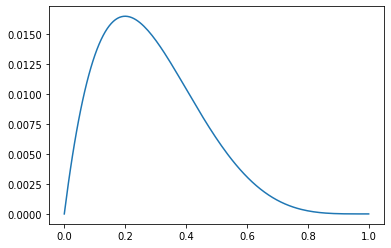

In [126]:
ys = run_sim_bayes(hyp, bias, iterations=5)
plt.plot(hyp, ys);

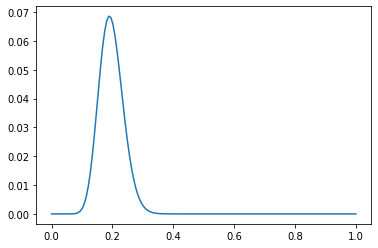

In [127]:
ys = run_sim_bayes(hyp, bias, iterations=100)
plt.plot(hyp, ys);


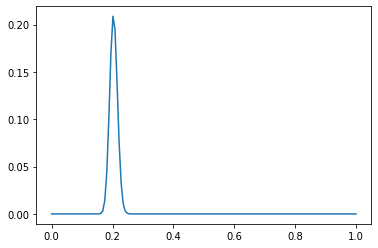

In [128]:
ys = run_sim_bayes(hyp, bias, iterations=1000)
plt.plot(hyp, ys);

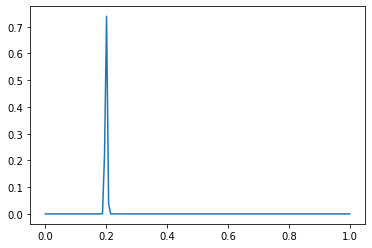

In [129]:
ys = run_sim_bayes(hyp, bias, iterations=15000)
plt.plot(hyp, ys);

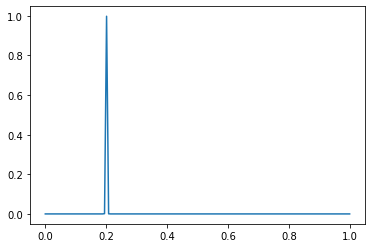

In [130]:
ys = run_sim_bayes(hyp, bias, iterations=50000)
plt.plot(hyp, ys);

### As we increase the number of coin flips, the posterior probability makes us more and more certain of a particular hypothesis. The Frequentists' main object to this is the use of prior probabilities, since they think they're subjective. Coincedentally, the Bayesians think that not using prior probabilities is one of the biggest weaknesses in Frequentist statistics. Furthermore, the Frequentist wouldn't be able to attach a probabilities to a set of hypotheses, like we did here to narrow down on the true bias. Lastly, suppose we could only flip the coin 10 times, after that, the coin is destroyed and we are asked to guess the probability of heads on the 10th flip. The Frequentist would scoff at attempting to assign probability to an event that is non repeatable, but the Bayesian would happily give you an estimate after observing the first 9 flips. 

### The Frequentists do however have a way to test hypotheses. That is, the calculate the probability of a deviation from the null hypothesis which is greater than or equal to the one you observe. This quantity is called the p-value = P(Observation| Null Hypothesis). Then they come up with a threshhold, usually .05, and if the p-value falls below this threshold, then you reject the null hypothesis. I don't see how this isn't calculating the probability of a hypothesis but what do I know. This standard threshold garuntees that, in the long run, you will falsely reject the null hypothesis 5% of the time. Essentially, the p-value controls the false positive rate. 

### Another way that Frequentists deal with uncertainty is the confidence interval. Put simply, if you calculate a 95% confidence interval, the in the long run, if others use the same procedure to calculate the confidence interval, 95% of those intervals would include the mean of the population you sample from. 